In [69]:
using StatsPlots
using StatsBase
gr(size=(700,350))

Plots.GRBackend()

In [70]:
# two-universal hash function
# P(h(x) == h(y)) <= 1/n
function twouniversalhash(n::Integer)::Function
    p::Integer = 49347083 # large prime
    a::Integer = rand(1:p)
    b::Integer = rand(1:p)
    h(x::Integer)::Integer = mod(mod(a*x + b, p), n)
    return h
end

twouniversalhash (generic function with 1 method)

In [74]:
# n = 100,000 instances of twouniversalhash
hashers = [twouniversalhash(100) for _ in 1:100000]
typeof(hashers)

Vector{var"#h#13"{Int64, Int64, Int64, Int64}} (alias for Array{var"#h#13"{Int64, Int64, Int64, Int64}, 1})

In [75]:
hashes = []
for h in hashers
    push!(hashes, h(1))
end
hashes = convert(Array{Integer}, hashes)
typeof(hashes)

Vector{Integer} (alias for Array{Integer, 1})

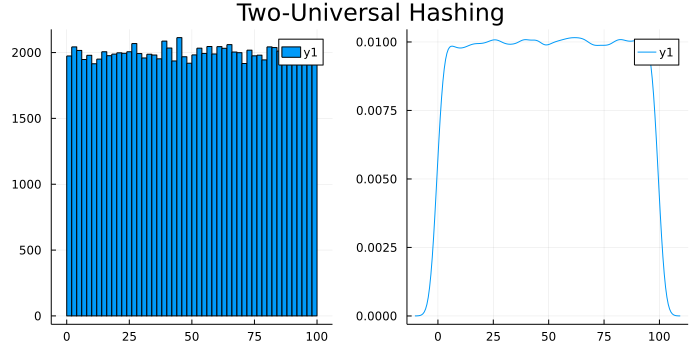

In [76]:
plot(histogram(hashes), density(hashes), plot_title="Two-Universal Hashing") # Nice flat distribution as expected